In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [4]:
claimants=pd.read_csv('Downloads\\claimants.csv')
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
claimants.drop(["CASENUM"],inplace=True,axis=1)
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [7]:
claimants.shape

(1340, 6)

In [8]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [9]:
claimants[claimants.isnull().any(axis=1)]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
9,1,0.0,1.0,0.0,NaN,0.350
20,0,0.0,NaN,0.0,37.0,3.100
23,0,0.0,NaN,0.0,30.0,0.609
29,0,0.0,1.0,0.0,NaN,0.595
31,1,0.0,1.0,0.0,NaN,0.337
...,...,...,...,...,...,...
1316,1,1.0,0.0,NaN,10.0,0.158
1318,1,1.0,1.0,0.0,NaN,0.070
1320,1,1.0,1.0,0.0,NaN,0.540
1321,0,0.0,1.0,0.0,NaN,3.437


In [10]:
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [11]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [12]:
claimants[claimants.isnull().any(axis=1)]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS


In [13]:
x=claimants.iloc[:,1:]
y=claimants.iloc[:,0]

In [14]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [15]:
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [16]:
Beta_coefficients=pd.Series(classifier.coef_[0])
Beta_coefficients

0    0.426879
1    0.570688
2   -0.594399
3    0.006539
4   -0.384248
dtype: float64

In [17]:
coef_df=pd.DataFrame({'Variables':['CLMSEX','CLMINSUR','SEATBELT','CLMAGE','LOSS'],'Beta coefficient':Beta_coefficients})
coef_df

,Variables,Beta coefficient
0,CLMSEX,0.426879
1,CLMINSUR,0.570688
2,SEATBELT,-0.594399
3,CLMAGE,0.006539
4,LOSS,-0.384248


In [18]:
classifier.intercept_

array([-0.17361679])

In [19]:
classifier.classes_

array([0, 1], dtype=int64)

In [20]:
classifier.predict_proba(x)[0:20]

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       [5.02209874e-01, 4.97790126e-01],
       [3.59246499e-01, 6.40753501e-01],
       [2.82097998e-01, 7.17902002e-01],
       [7.11678102e-01, 2.88321898e-01],
       [6.96194588e-01, 3.03805412e-01],
       [2.93084434e-01, 7.06915566e-01],
       [7.87948853e-01, 2.12051147e-01],
       [9.98962534e-01, 1.03746561e-03],
       [5.50310368e-01, 4.49689632e-01],
       [3.04299526e-01, 6.95700474e-01],
       [2.66795645e-01, 7.33204355e-01],
       [4.27576159e-01, 5.72423841e-01],
       [2.34335001e-01, 7.65664999e-01],
       [3.81056529e-01, 6.18943471e-01],
       [3.97309628e-01, 6.02690372e-01],
       [6.80112050e-01, 3.19887950e-01],
       [2.63275218e-01, 7.36724782e-01]])

In [21]:
classifier.score(x,y)

0.708029197080292

In [22]:
y_pred=classifier.predict(x)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [23]:
y_pred_df=pd.DataFrame({'actual':y,'predictions':classifier.predict(x)})

In [24]:
y_pred_df[0:30]

,actual,predictions
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0
7,0,0
8,1,1
10,0,0


In [66]:
len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']])/len(y_pred_df)

0.708029197080292

In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
print(cm)

[[381 197]
 [123 395]]


In [70]:
TP=len(y_pred_df[(y_pred_df['actual']==1)&(y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0)&(y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0)&(y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1)&(y_pred_df['predictions']==0)])

In [71]:
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 395
True Negative: 381
False Positive: 197
False Negative: 123


In [72]:
((TP+TN)/(TP+TN+FP+FN))*100

70.8029197080292

In [73]:
sensitivity=(TP/(TP+FN))
print('sensitivity:',round(sensitivity,2))

sensitivity: 0.76


In [74]:
specificity=(TN/(TN+FP))
print('specificity:',round(specificity,2))

specificity: 0.66


In [75]:
precision=(TP/(TP+FP))
print('precision:',round(precision,2))

precision: 0.67


In [78]:
F_score=(2*precision*sensitivity)/(precision+sensitivity)
print('F_score:',round(F_score,2))

F_score: 0.71


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
print(auc)

0.7108589063606365


Text(0, 0.5, 'True Positive Rate')

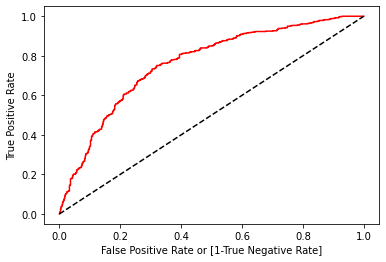

In [82]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logitmodel(area=50.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')